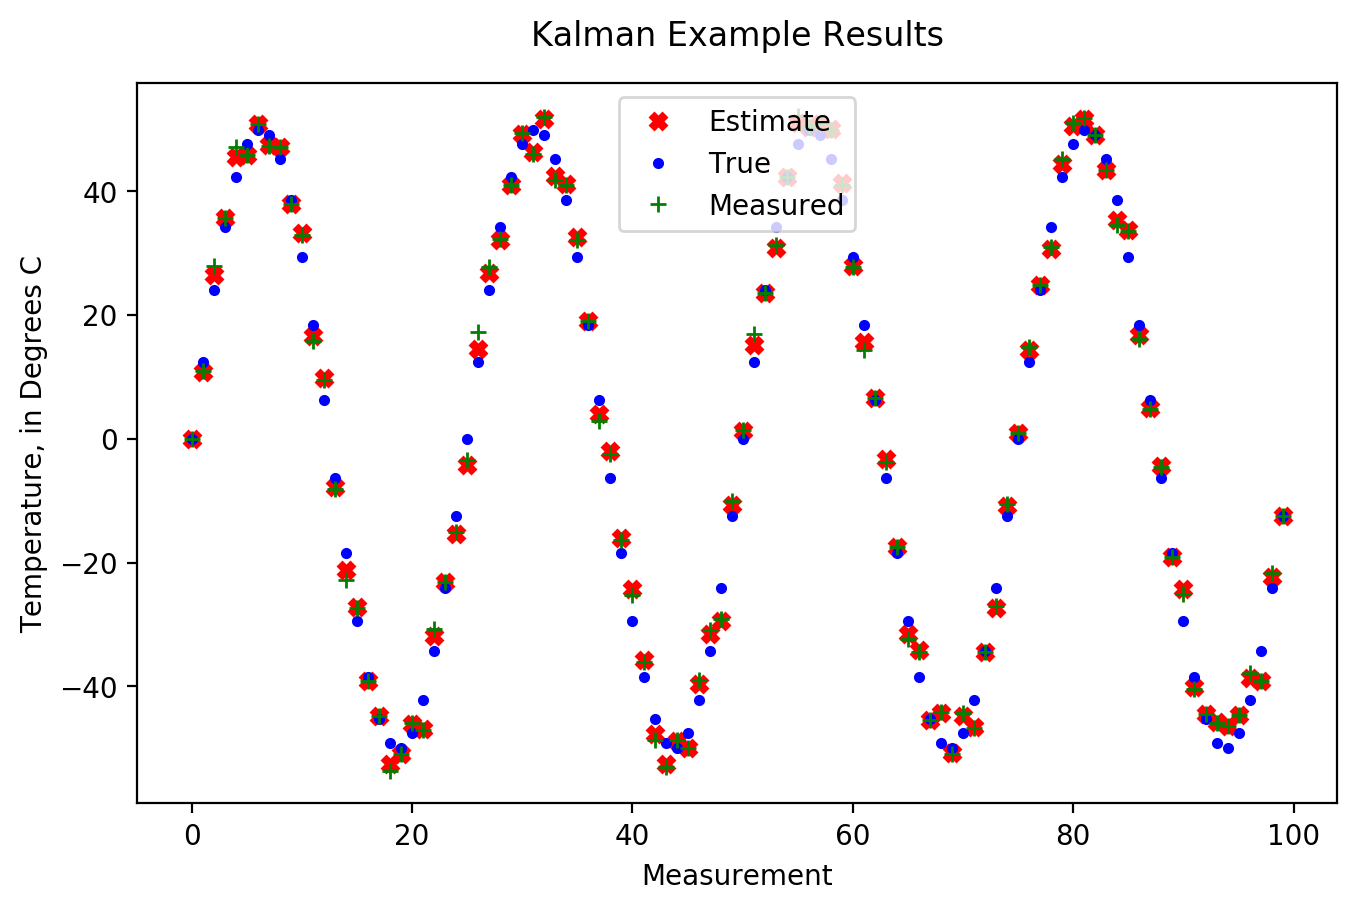

In [53]:
#I want to take a look at this example with more dynamic motion

#It would appear having the right process noise value is very important

#This is an attempt to replicate example 8 from Kalmanfilter.net
#The example attempts to track the temperature of a constantly heating liquid
#using an incorrect system dynamics model and large process noise to compensate
#If I can get this to work, then I will attempt to modify the system dynamics
#model to be correct, which also involves a change to the covariance equation


import math
import random

#First lets load the true temperature values into a list
truetemp = []
i = 0
while i < 100:
    truetemp.append(50*(math.sin(2*math.pi*i/25)))
    i += 1

#Now lets load the measured temperature values into another list
meastemp = []
i = 0
while i < 100:
    meastemp.append(50*(math.sin(2*math.pi*i/25)) + 5*random.uniform(-1,1))
    i += 1

#Ok, define a bit of notation.  x will be current value.  xp will be short for x plus 1.
#xm will be short for x minus 1.  Other letters will follow the same convention.  If I should
#need to recall values greater than minus one, the value will follow the m, so xm2 is x minus 2.

#The equations and variables are as follow:

#Filtering Equation
#x = xm + K(z-xm)
#Here x is the current temperature estimate
#xm is the previous temperature estimate
#K is the current Kalman gain
#z is the current temperature measurement

#State Extrapolation Equation
#xp = x
#This is not the correct equation for the process, but that is part of the example

#Kalman Gain
#K = p/(p-r)
#K is current Kalman gain
#p is the estimate uncertainty
#r is the current measurement uncertainty, the measurement variance

#Covariance Update
#pm = (1-K)p
#pm is the updated estimate uncertainty
#This is confusing and due to his notation being a bit odd

#Covariance Extrapolation
#p = pm + q
#q is the process noise variance, it is the uncertainty of the dynamic model

#Hopefully I manage to stay consistent with the notation

#Initialization of some parameters is required

q = 150
xm = 10
pm = 10000  #100**2

#Lets also create an empty array to hold Kalman gains
K = []

#Lets also create an empty array to hold estimates
est = []

i = 0
while i < len(meastemp):
    #Extrapolate covariance
    p = pm + q
    r = (meastemp[i] - truetemp[i])**2
    #Calculate K
    K.append(p/(p+r))
    #Estimate current state
    x = xm + K[i]*(meastemp[i] - xm)
    est.append(x)
    #Update covariance
    pm = (1-K[i])*p
    #Extrapolate state
    xm = x
    i += 1

#Ok, that seems like it, now to plot estimates vs. measured

import matplotlib as mpl
import matplotlib.pyplot as plt
default_dpi = mpl.rcParamsDefault['figure.dpi']
mpl.rcParams['figure.dpi'] = default_dpi*2
fig = plt.figure()
ax = fig.add_axes([0,0,1,.9])
line1, = ax.plot(est,'rX',label = "Estimate")
line2, = ax.plot(truetemp,'b.',label = "True")
line3, = ax.plot(meastemp, 'g+',label = "Measured")
plt.xlabel('Measurement')
plt.ylabel('Temperature, in Degrees C')

ax.legend(loc = 'upper center')
fig.suptitle("Kalman Example Results")

plt.show()
    


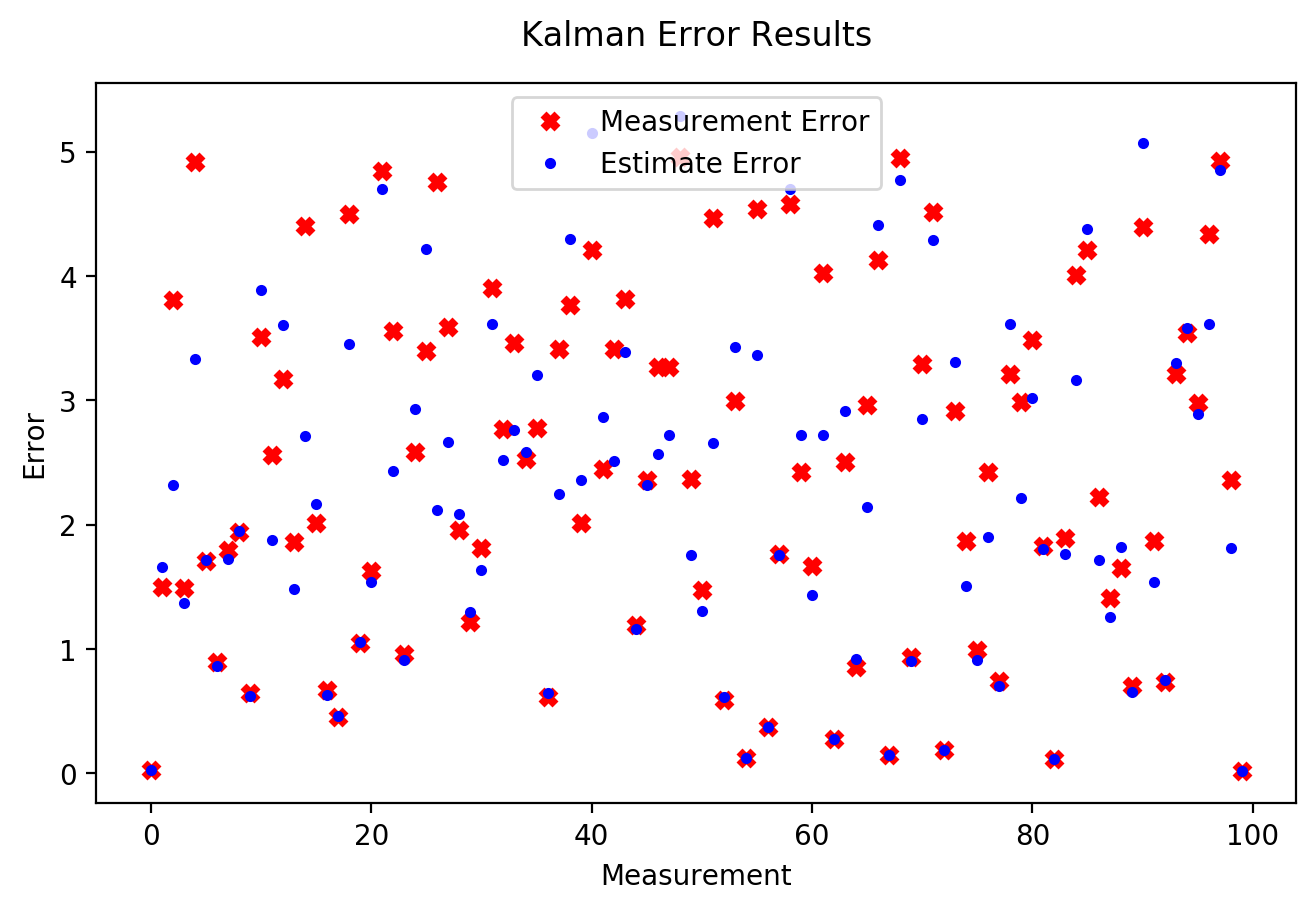

In [54]:
#Let's look at the error between the true, estimate and measured

errmeas = []
errest = []

i = 0
while i < (len(truetemp)):
    errmeas.append(abs(truetemp[i]-meastemp[i]))
    errest.append(abs(truetemp[i]-est[i]))
    i+=1

fig = plt.figure()
ax = fig.add_axes([0,0,1,.9])
line1, = ax.plot(errmeas,'rX',label = "Measurement Error")
line2, = ax.plot(errest,'b.',label = "Estimate Error")
plt.xlabel('Measurement')
plt.ylabel('Error')

ax.legend(loc = 'upper center')
fig.suptitle("Kalman Error Results")

plt.show()

In [55]:
sum(errest)/len(errest)

2.2775229042183955

In [56]:
sum(errmeas)/len(errmeas)

2.48621889363423